<h1>Tensor Network Space-Time Spectral Collocation Method for Solving the Nonlinear Convection Diffusion Equation</h1>

Dibyendu Adak, M. Engin Danis, Duc P. Truong, Kim Ø. Rasmussen & Boian S. Alexandrov 

http://link.springer.com/article/10.1007/s10915-025-02860-x

This notebook corresponds to the results of Fig. 5 of the above paper

In [4]:
addpath(genpath('../../matlab/Linear-STSC/src/'))
addpath(genpath('../../matlab/Non-linear-STSC/src/'))
addpath(genpath('../../matlab/utils/chebfun/'))
addpath(genpath('../../matlab/utils/tt-toolbox/'))
addpath(genpath('../../matlab/utils/ttfunc/'))

close all; clear; clc;

ans = 4

ans = 6

ans = 8

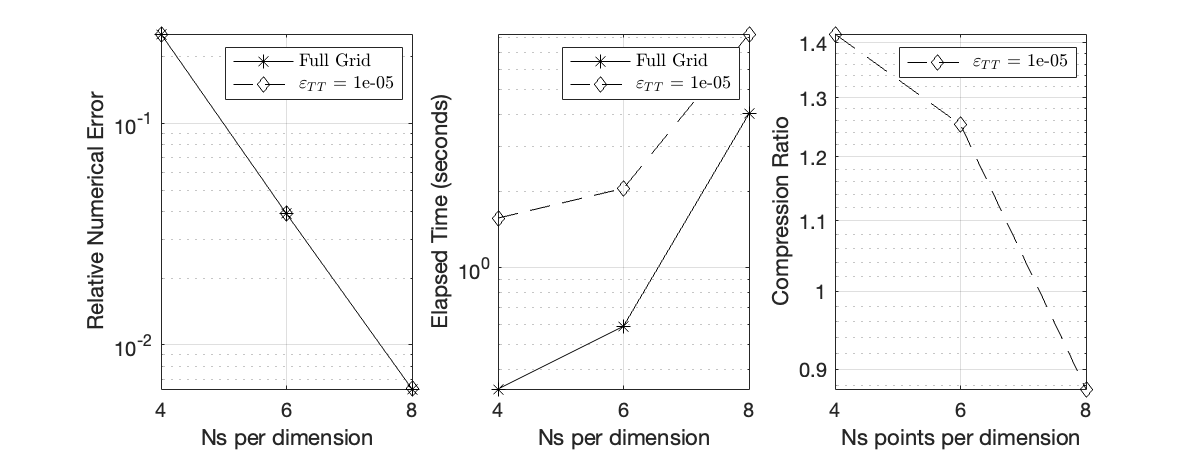

In [5]:
%% load results files

testname = "testcases/Burger3D";
exactrank = 1;
b = 6;

tol = 1e-5;
fgtol = 1e-5;

tolstr = num2str(tol);
fgtolstr = num2str(fgtol);

tempname = split(testname,'/');
fgdata = load(sprintf('plot_data/fg_%s.mat',tempname(end)));
ttdata = load(sprintf('plot_data/tt_%s.mat',tempname(end)));

%% 3 plots solution differences in rho
fgI = 1:3;%[1:numel(fgdata.Ns)];
ttI = 1:3;%[1:numel(ttdata.Ns)];
iterI = 1;
iter2I = 1;
fgNs = fgdata.Ns(fgI);
ttNs = ttdata.Ns(ttI);

fgtime = cellfun(@(c) c.time, fgdata.R(fgI));
tttime = cellfun(@(c) c.time, ttdata.R(ttI,iterI));

fgerr = cellfun(@(c) c.err, fgdata.R(fgI));
tterr = cellfun(@(c) c.err, ttdata.R(ttI,iterI));

fgniter = cellfun(@(c) c.NewtonIter, fgdata.R(fgI));
ttniter = cellfun(@(c) c.NewtonIter, ttdata.R(ttI,iterI));

[comprate,numelement] = cellfun(@(c) compress_ratio_tt(c.sol), ttdata.R(ttI));

for i = 1:numel(ttNs)
  ttNs(i)
  trncsol = round(ttdata.R{i,1}.sol,min(ttdata.R{i,1}.err,1));
  exactcompression(i) = compress_ratio_tt(tt_rand(trncsol.n,4,exactrank));
  % trncsol.r
  trunccomp(i) = compress_ratio_tt(trncsol);
end


%%

fgmrk = '-*k';
ttmrk = '--dk';
tttrmrk = '--ok';
% figure('Position',[347,591,1585,545])
figure()
subplot(1,3,1)
grid on;
hold on;
plot(fgNs,fgerr,fgmrk)
plot(ttNs,tterr,ttmrk)

xlabel(sprintf('Ns per dimension', Interpreter='latex'))
ylabel(sprintf('Relative Numerical Error',Interpreter='latex'))
% set(gca, 'YScale','log','Xscale','log')
set(gca, 'YScale','log')
legend('Full Grid',sprintf('$\\varepsilon_{TT}$ = %s',tolstr),...
Interpreter='latex')
box on;

subplot(1,3,2) % grid size vs time
grid on;
hold on;
plot(fgNs,fgtime,fgmrk,'DisplayName','');
plot(ttNs,tttime,ttmrk,'DisplayName','');

xlabel(sprintf('Ns per dimension', Interpreter='latex'))
ylabel('Elapsed Time (seconds)')
legend('Full Grid',sprintf('$\\varepsilon_{TT}$ = %s',tolstr),...
Interpreter='latex')
set(gca, 'YScale','log')
box on;

%%%%% compression plot
subplot(1,3,3) % grid size vs time
grid on;
hold on;
plot(ttNs,comprate,ttmrk)
xlabel(sprintf('Ns points per dimension', Interpreter='latex'))
ylabel('Compression Ratio')
set(gca, 'YScale','log')
legend(sprintf('$\\varepsilon_{TT}$ = %s',tolstr),...
Interpreter='latex')
box on;


x0=10;
y0=10;
width=600;
height=225;
set(gcf,'position',[x0,y0,width,height])